# Resize

圖像放大縮小  
圖像放大縮小應用於一些模型偵測時  
需要吃特定大小的圖形  
其所需的操作

## resize

resize(src, dsize, dst, fx, fy, interpolation)  
opencv提供的方大縮小標準函式，需要填入的值有
* src: 原圖
* dsize: 縮放大小,這裡是給予一組tuple指定size
* dst: 目標圖，可以不用，直接用一個新的物件去接就好
* fx: x方向的縮放比例
* fy: y方向的縮放比例，當fx,fy設定後，dsize將之設定為None
* interpolation: 插值法，常用以下四種
   * INTER_NEAREST（最鄰近）
   * INTER_CUBIC  (三次方)
   * INTER_LINEAR(線性)
   * INTER_AREA  (區域)
   * 通常放大時利用CUBIC與LINEAR避免鋸齒出現，縮小時利用AREA避免波紋出現

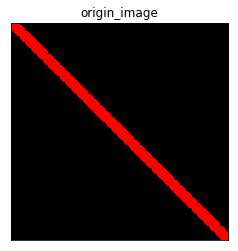

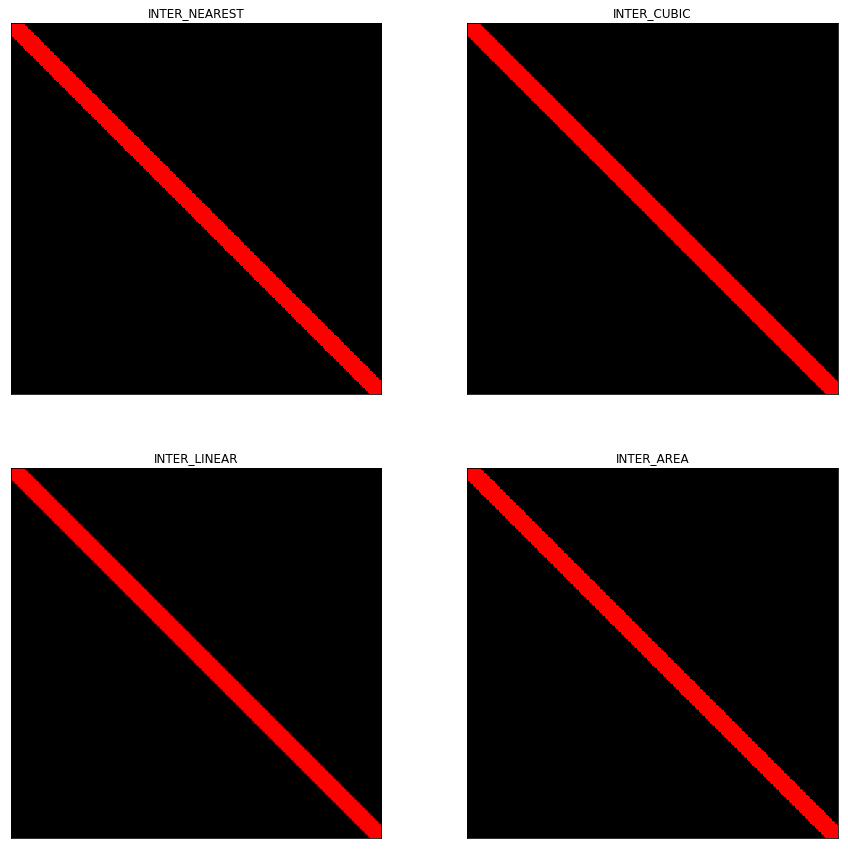

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = np.zeros((256,256,3),np.uint8)# create img
cv.line(img,(0,0),(256,256),(0,0,255),10,3,0)

img1 = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_NEAREST)
img2 = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)
img3 = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_LINEAR)
img4 = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_AREA)

imgs = [img1,img2,img3,img4]
titles=['INTER_NEAREST','INTER_CUBIC','INTER_LINEAR','INTER_AREA']


plt.imshow(img[:,:,::-1])
plt.xticks([]),plt.yticks([])
plt.title('origin_image')

plt.figure(figsize=(15,15))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(imgs[i][:,:,::-1])
    plt.xticks([]),plt.yticks([])
    plt.title(titles[i])

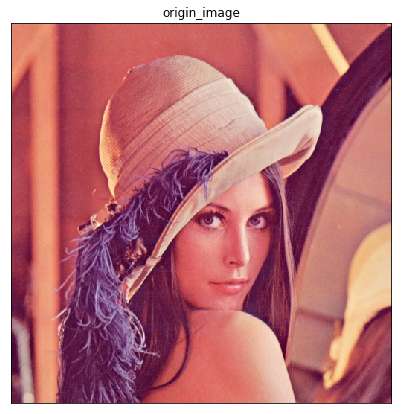

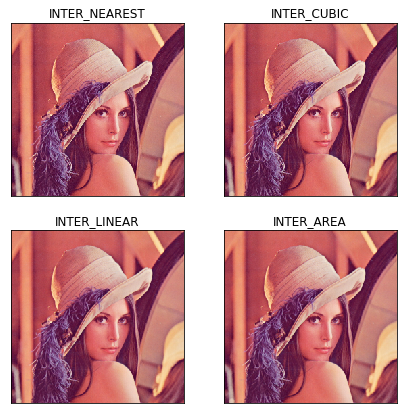

In [11]:
import os 

root = os.getcwd()
img_path = os.path.join(root,'Image/lena.jpg')

img = cv.imread(img_path,1)

img1 = cv.resize(img, None, fx=0.5, fy=0.5, interpolation=cv.INTER_NEAREST)
img2 = cv.resize(img, None, fx=0.5, fy=0.5, interpolation=cv.INTER_CUBIC)
img3 = cv.resize(img, None, fx=0.5, fy=0.5, interpolation=cv.INTER_LINEAR)
img4 = cv.resize(img, None, fx=0.5, fy=0.5, interpolation=cv.INTER_AREA)

imgs = [img1,img2,img3,img4]
titles=['INTER_NEAREST','INTER_CUBIC','INTER_LINEAR','INTER_AREA']

plt.figure(figsize=(7,7))
plt.imshow(img[:,:,::-1])
plt.xticks([]),plt.yticks([])
plt.title('origin_image')

plt.figure(figsize=(7,7))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(imgs[i][:,:,::-1])
    plt.xticks([]),plt.yticks([])
    plt.title(titles[i])

# pyrDown, pyrUp

影像金字塔  
所做的操作是放大一倍，或是縮小一倍  
直接呼叫函式把圖丟進去就可以

金字塔的運算:  
縮小:
* 對影像用高斯濾波器進行卷積運算
* 丟棄偶數行與列

放大: 
* 將原圖放大兩倍，奇數行與列是原值，偶數行與列是零
* 對圖像進行高斯濾波卷積運算

高斯濾波器
![](https://i.imgur.com/thPkIxg.png)

(<matplotlib.axes._subplots.AxesSubplot at 0x1d1bdccd0f0>,
 Text(0.5, 1.0, 'pyrUp'))

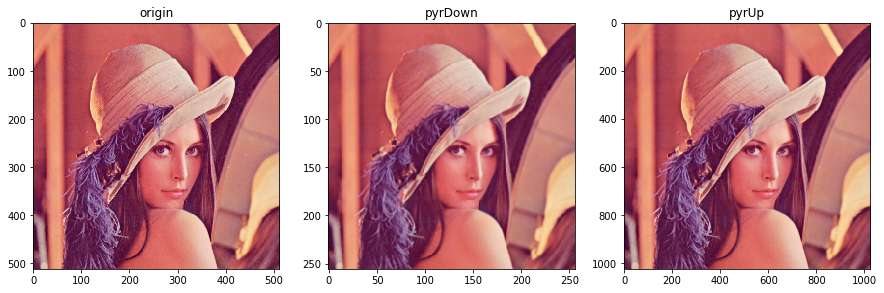

In [16]:
img1 = cv.pyrDown(img)
img2 = cv.pyrUp(img)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.imshow(img[:,:,::-1]), plt.title('origin')
plt.subplot(1,3,2), plt.imshow(img1[:,:,::-1]), plt.title('pyrDown')
plt.subplot(1,3,3), plt.imshow(img2[:,:,::-1]), plt.title('pyrUp')

圖像金字塔還有一種拉普拉斯金字塔  
藉由高斯金字塔獲得，公式為:
$$ L_i=G_i-PyrUp(G_{i+1})) $$

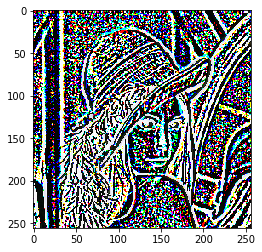

In [17]:
img1 = cv.pyrDown(img)
temp1 = cv.pyrDown(img1)
temp2 = cv.pyrUp(temp1)

img2 = img1 - temp2

plt.imshow(img2[:,:,::-1])